In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use("fivethirtyeight")

In [2]:
def BasisSpline(p):
    """
    Given a degree p, returns a callable basis function object used for
    computing a spline curve.
    """
    if p == 0:
        def basis(j, t, knots):
            if knots[j] <= t < knots[j+1]:
                return 1.0
            else:
                return 0.0
    else:
        def basis(j, t, knots):
            l_one = (t - knots[j]) / (knots[j+p] - knots[j])
            l_two = (knots[j+1+p]  - t) / (knots[j+1+p] - knots[j+1])
            B = BasisSpline(p-1)

            return l_one * B(j, t, knots) + l_two * B(j + 1, t, knots)

    # Storing the degree in the function object
    basis.p = p
    return basis

In [14]:
def demo():
    p = 0
    t_values = np.linspace(0, 10, 1000)
    knots = range(len(t_values))
    for p in [0, 1, 2, 3, 4]:
        B = BasisSpline(p)
        result = [] 
        for t in t_values:
            result.append(B(p+1, t, knots))
        plt.plot(t_values, result, label='$p = %d$' % p, alpha=0.7)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.show()

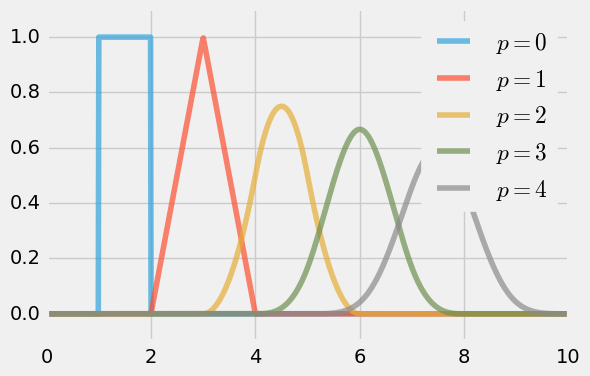

In [15]:
if __name__ == '__main__':
    demo()